# Brief Comments 

**In this project multiple linear regression will be conducted.

**The variables in question are Quality Of Life Index, Purchasing Power Index, Safety Index, Health Care Index, Cost of Living.

**In my view I wanted to determine if the quality of life index has a significant or insignificant relationship with other socio-economic indices, which I choose personally, as I consider them as an elements that add to a good quality of life.

**The data is collected from 66 countries.


# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import squarify
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Data cleaning

In [2]:
#import data from csv file
pd.set_option("display.max_columns", None)
df_data = pd.read_csv('soci_econ_country_profiles.csv')
df_data.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.20,95.90,632343,2.40,"14,564.50",6,27.80,66.20,2.00,24.80,73.10,6.50,48.6/74.4,119,119,57733,55610,2124,-15944,1,91.80,1,2.30,24.9/15.4,2086.3/4.8,5,13.70,4.80,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.90,143.90,69.40,256,10.00,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,4

In [3]:
#CLeaning data by only the relevant columns
df_data_cleaned = df_data[['country', 'Region','Quality Of Life Index', 
                          'Purchasing Power Index', 
                          'Safety Index', 
                          'Health Care Index', 
                          'Cost of Living']]

df_data_cleaned

df_data_cleaned.to_csv('Quality of life index.csv')

In [4]:
#Checking data types of the columns
df_data_cleaned.dtypes

country                    object
Region                     object
Quality Of Life Index     float64
Purchasing Power Index    float64
Safety Index              float64
Health Care Index         float64
Cost of Living            float64
dtype: object

In [5]:
#Checking if there are null values in the dataframe
df_data_cleaned.isnull().values.any()

False

# Descriptive Statistics

In [6]:
df_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 66 non-null     object 
 1   Region                  66 non-null     object 
 2   Quality Of Life Index   66 non-null     float64
 3   Purchasing Power Index  66 non-null     float64
 4   Safety Index            66 non-null     float64
 5   Health Care Index       66 non-null     float64
 6   Cost of Living          66 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.7+ KB


In [7]:
df_data_cleaned.describe()

,Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living
count,66.00,66.00,66.00,66.00,66.00
mean,134.10,71.39,60.63,65.86,55.27
std,42.07,29.97,14.16,10.10,20.90
min,0.71,3.35,14.72,36.90,22.36
25%,102.69,47.71,52.71,60.43,38.38
50%,141.06,70.12,60.10,67.15,49.80
75%,167.11,95.86,70.77,73.89,72.91
max,190.37,138.05,84.30,83.20,122.06


# Defining our variables and using the train test model (Machine Learning)

In [8]:
#Independent variables 
x = df_data_cleaned.drop(['country', 'Region', 'Quality Of Life Index'], 
                         axis = 1).values 

#Dependent variable
y = df_data_cleaned['Quality Of Life Index'].values

In [9]:
# Splitting the data into two groups (training set and testing set)
# Setting the portion of the testing set to 25%
#** The train data set is used to fit the regression model, the testing data set is used to evaluate the fit of the regression model
# Random state will be set to 0 so as to reproduce the results.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
print(x_train)
print(x_train.shape)

[[102.52  79.11  78.63  85.28]
 [ 81.45  79.32  67.99  79.96]
 [ 58.24  59.68  53.92  55.87]
 [ 71.75  68.47  61.46  38.15]
 [  3.35  14.72  36.9   38.3 ]
 [ 53.61  50.84  64.28  61.65]
 [ 51.4   59.82  54.03  36.49]
 [ 95.92  67.54  54.23  54.07]
 [ 43.18  49.1   51.55  38.26]
 [103.52  54.23  53.33  76.98]
 [ 95.35  77.55  71.04 122.06]
 [ 62.72  64.61  70.31  49.19]
 [111.28  84.3   66.14  69.2 ]
 [ 26.93  48.73  49.81  26.22]
 [ 68.48  77.    71.3   49.5 ]
 [ 96.85  58.81  74.28  69.49]
 [ 76.22  69.82  74.09  41.22]
 [ 51.29  59.03  61.49  35.05]
 [ 98.76  78.87  75.45  83.02]
 [ 87.29  56.34  78.62  74.89]
 [ 34.28  50.22  80.66  43.71]
 [108.01  60.75  69.23  70.16]
 [ 60.71  72.2   65.49  48.  ]
 [ 27.61  50.32  64.8   41.11]
 [ 89.87  61.22  70.58  80.77]
 [ 29.39  47.14  43.73  22.36]
 [ 92.7   83.42  69.87  82.41]
 [ 98.96  24.28  61.72  43.12]
 [ 39.85  61.34  63.46  30.93]
 [105.58  54.31  74.19 106.31]
 [101.94  57.58  74.25  80.66]
 [ 37.63  48.31  65.79  34.45]
 [ 30.28

In [11]:
print(x_test)
print(x_test.shape)

[[ 53.44  72.05  53.11  35.63]
 [ 94.47  70.99  74.78  77.74]
 [ 71.83  55.34  66.31  83.7 ]
 [107.23  53.35  70.64  75.88]
 [123.17  51.24  68.22  75.42]
 [ 42.27  56.86  71.92  59.22]
 [ 78.23  75.95  64.35  53.24]
 [ 48.27  53.95  56.4   42.01]
 [ 73.34  35.25  65.99  40.24]
 [ 91.02  55.49  78.92  75.36]
 [ 60.08  49.68  70.11  29.81]
 [ 36.    60.23  69.16  34.71]
 [ 51.67  59.97  68.74  46.73]
 [ 40.8   61.38  53.86  33.79]
 [ 24.77  47.04  47.87  40.11]
 [ 95.66  80.75  80.91  71.52]
 [ 67.84  66.1   62.25  44.76]]
(17, 4)


In [12]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

# Predicting the test results

In [13]:
y_predict = linear_model.predict(x_test)
print(y_predict)

[119.39665895 160.7320866  132.47258575 162.48208736 172.75088655
 115.20347265 145.34572673 110.9012325  130.07025005 155.59320206
 127.77863042 111.62531993 122.55959321 106.64592145  85.40902237
 169.00944181 133.40342091]


In [14]:
linear_model.predict([[58.40,37.37,73.30,52.57]])

array([122.62089785])

# Evaluating coefficient of determination

In [15]:
# In multiple linear regression, the R2 represents the correlation coefficient between
# the observed values of the outcome variable (y) and the fitted (i.e., predicted) values of y. 

# Therefore this model 52.52% of the data fits the regression model
r2_score(y_test, y_predict)

0.5252336213674396

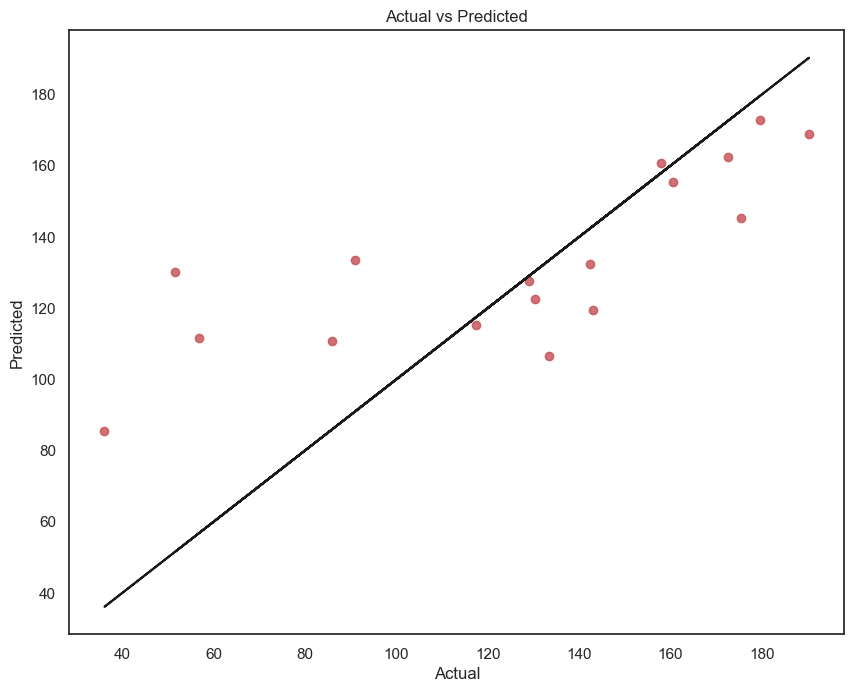

In [16]:
plt.scatter(y_test,
            y_predict, 
            color = 'r', 
            alpha = 0.8)
plt.plot(y_test,
         y_test, 
         color = 'k', 
         label = 'y = y' )
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Regression using OLS method

In [17]:
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     18.73
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           4.36e-10
Time:                        13:03:28   Log-Likelihood:                -313.51
No. Observations:                  66   AIC:                             637.0
Df Residuals:                      61   BIC:                             648.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7183     25.465      0.382      0.704     -41.203      60.640
x1             0.7758      0.180      4.310      0.000       0.416       1.136
x2             0.5802      0.295      1.969      0.053      -0.009       1.169
x3             0.4980      0.434      1.147      0.256      -0.370       1.366
x4             0.0185      0.249      0.074      0.941      -0.479       0.516
==============================================================================
Omnibus:                       10.359   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.987
Skew:                          -0.996   Prob(JB):                      0.00411
Kurtosis:                       3.161   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression plot of each independent variables against the dependent variable

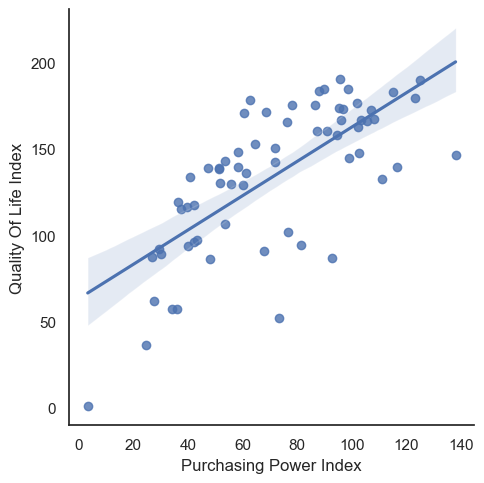

<Figure size 800x600 with 0 Axes>

In [18]:
#Regression plot of Quality of Life Index & Purchasing Power Idex

#Creating a function for the Regression plot
def reg_plot(x_var):
    sns.lmplot(x = x_var, 
               y = 'Quality Of Life Index', 
               data = df_data_cleaned)
    plt.figure(figsize = (8,6))
    plt.show()
    
reg_plot('Purchasing Power Index')

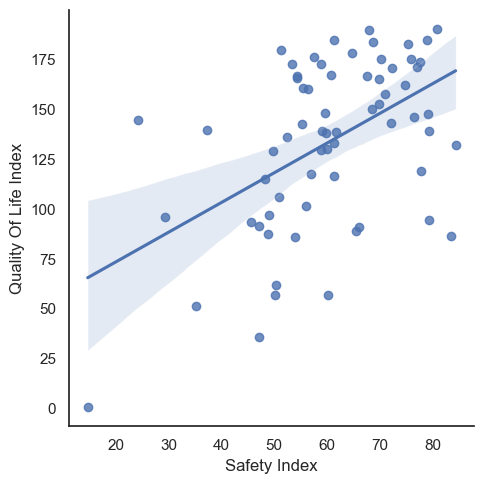

<Figure size 800x600 with 0 Axes>

In [19]:
#Regression plot of Quality of Life Index & Safety Index
reg_plot('Safety Index')

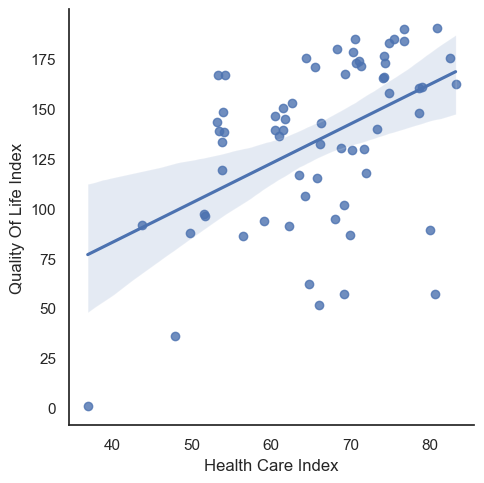

<Figure size 800x600 with 0 Axes>

In [20]:
#Regression plot of Quality of Life Index & Health Care Index
reg_plot('Health Care Index')

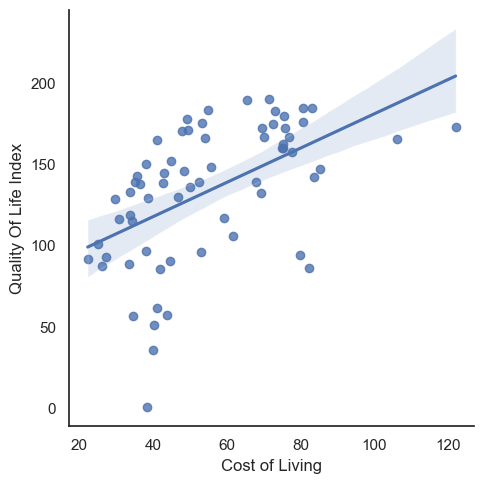

<Figure size 800x600 with 0 Axes>

In [21]:
#Regression plot of Quality of Life Index & Cost of Living
reg_plot('Cost of Living')

# Correlation using heatmap

(5.5, -0.5)

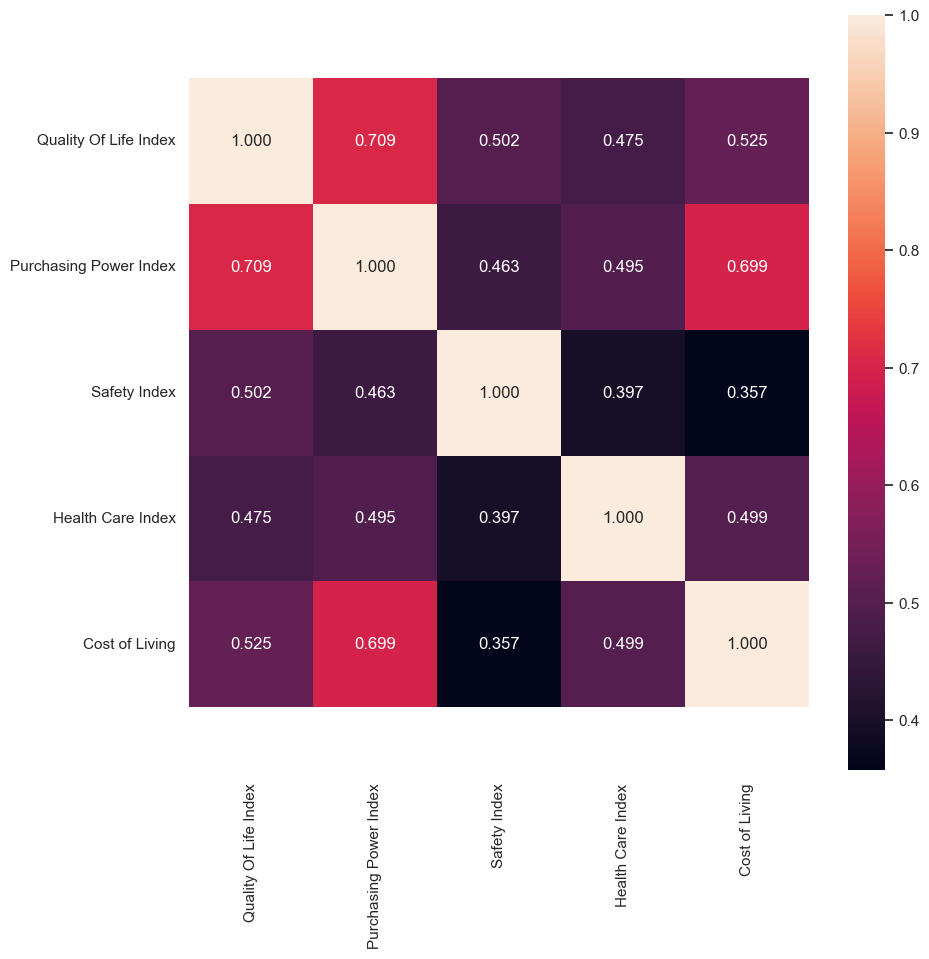

In [22]:
#Correlation using heatmap
plt.figure(figsize = (10,10))
ax = sns.heatmap(df_data_cleaned.corr(), 
                 annot = True, 
                 fmt = '.3f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Treemap Visualisation of Top 10 and bottom 10 by Country for Quality of Life 

In [23]:
#Sorting data by Quality of life in desc for the top 10
df_data_cleaned_sorted_by_qol_top10 = df_data_cleaned.sort_values('Quality Of Life Index', 
                                                                  ascending = False)
df_data_cleaned_sorted_by_qol_top10 = df_data_cleaned_sorted_by_qol_top10.iloc[:10]
df_data_cleaned_sorted_by_qol_top10

,country,Region,Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living
2,Austria,WesternEurope,190.37,95.66,80.75,80.91,71.52
21,Germany,WesternEurope,189.74,124.88,67.97,76.74,65.50
16,Denmark,NorthernEurope,184.92,98.76,78.87,75.45,83.02
37,New Zealand,Oceania,184.74,89.87,61.22,70.58,80.77
53,Spain,SouthernEurope,183.65,87.87,68.72,76.65,54.98
19,Finland,NorthernEurope,182.93,114.97,75.37,74.85,73.06
63,United States of America,NorthernAmerica,179.73,123.17,51.24,68.22,75.42
42,Portugal,SouthernEurope,178.43,62.72,64.61,70.31,49.19
1,Australia,Oceania,176.54,101.94,57.58,74.25,80.66
51,Slovenia,SouthernEurope,175.45,78.23,75.95,64.35,53.24


In [24]:
country_list_top10 = list(df_data_cleaned_sorted_by_qol_top10['country'])

quality_of_life_index_top10 = list(df_data_cleaned_sorted_by_qol_top10['Quality Of Life Index'])

print(quality_of_life_index_top10)

[190.37, 189.74, 184.92, 184.74, 183.65, 182.93, 179.73, 178.43, 176.54, 175.45]


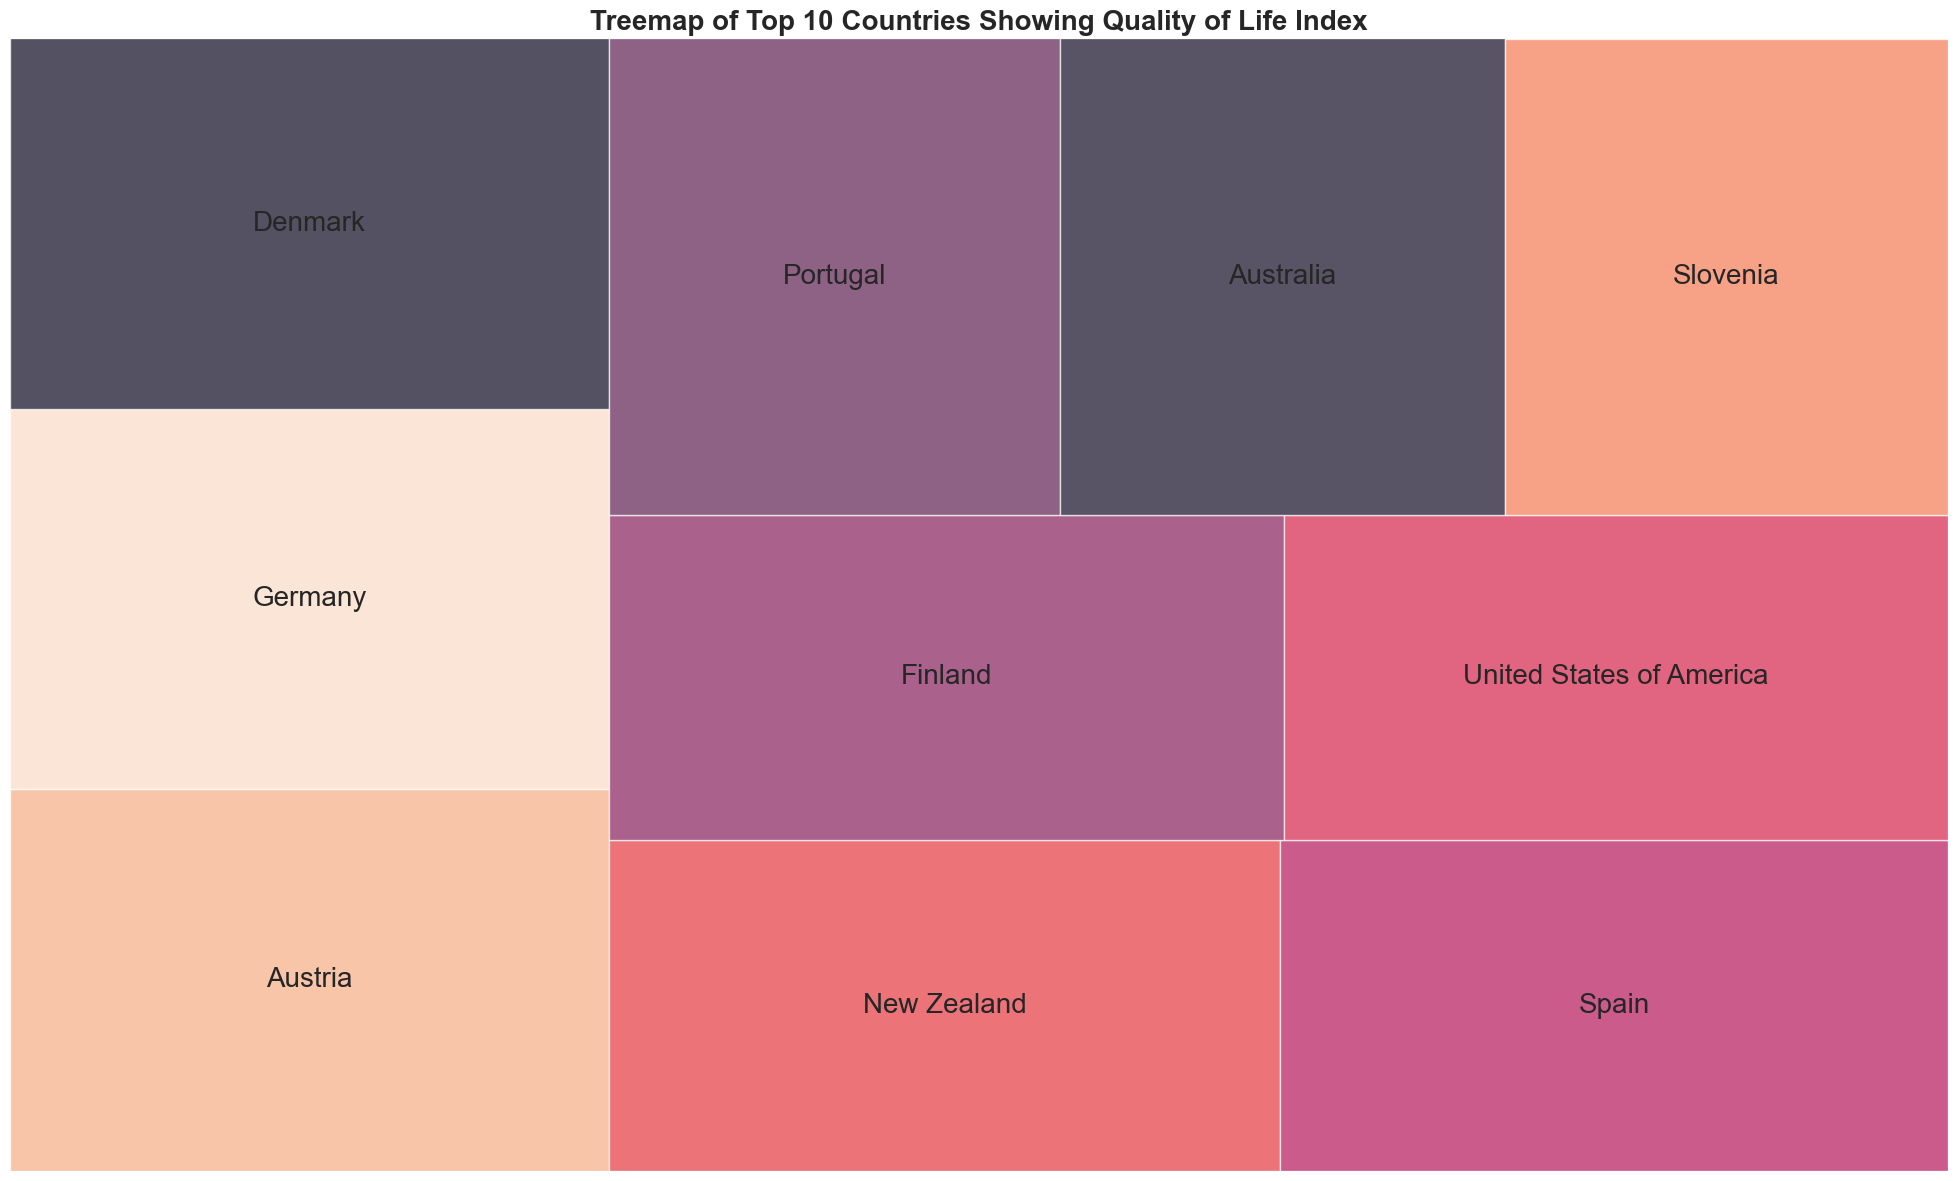

In [25]:
#Tree map of top 10 countries based on Quality of Life Index
plt.figure(figsize = (25,15))

squarify.plot(sizes = quality_of_life_index_top10, 
              label = country_list_top10, 
              pad = False, 
              bar_kwargs={'alpha':.7}, 
              text_kwargs={'fontsize':20})

plt.title('Treemap of Top 10 Countries Showing Quality of Life Index', fontweight='bold', fontsize = 20)
plt.axis('off');

In [26]:
#Sorting data by Quality of life in desc for the top 10
df_data_cleaned_sorted_by_qol_bottom10 = df_data_cleaned.sort_values('Quality Of Life Index',
                                                                     ascending = True)
df_data_cleaned_sorted_by_qol_bottom10 = df_data_cleaned_sorted_by_qol_bottom10.iloc[:10]
df_data_cleaned_sorted_by_qol_bottom10

,country,Region,Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living
64,Venezuela (Bolivarian Republic of),SouthAmerica,0.71,3.35,14.72,36.90,38.30
65,Vietnam,South-easternAsia,36.12,24.77,47.04,47.87,40.11
34,Malaysia,South-easternAsia,51.65,73.34,35.25,65.99,40.24
40,Philippines,South-easternAsia,56.87,36.00,60.23,69.16,34.71
57,Thailand,South-easternAsia,57.21,34.28,50.22,80.66,43.71
25,Indonesia,South-easternAsia,62.02,27.61,50.32,64.80,41.11
46,Russian Federation,EasternEurope,85.93,48.27,53.95,56.40,42.01
49,Singapore,South-easternAsia,86.50,92.70,83.42,69.87,82.41
60,Ukraine,EasternEurope,87.49,26.93,48.73,49.81,26.22
54,Sri Lanka,SouthernAsia,88.99,30.28,65.43,80.04,33.47


In [27]:
country_list_bottom10 = list(df_data_cleaned_sorted_by_qol_bottom10['country'])

quality_of_life_index_bottom10 = list(df_data_cleaned_sorted_by_qol_bottom10['Quality Of Life Index'])

print(quality_of_life_index_bottom10)

[0.71, 36.12, 51.65, 56.87, 57.21, 62.02, 85.93, 86.5, 87.49, 88.99]


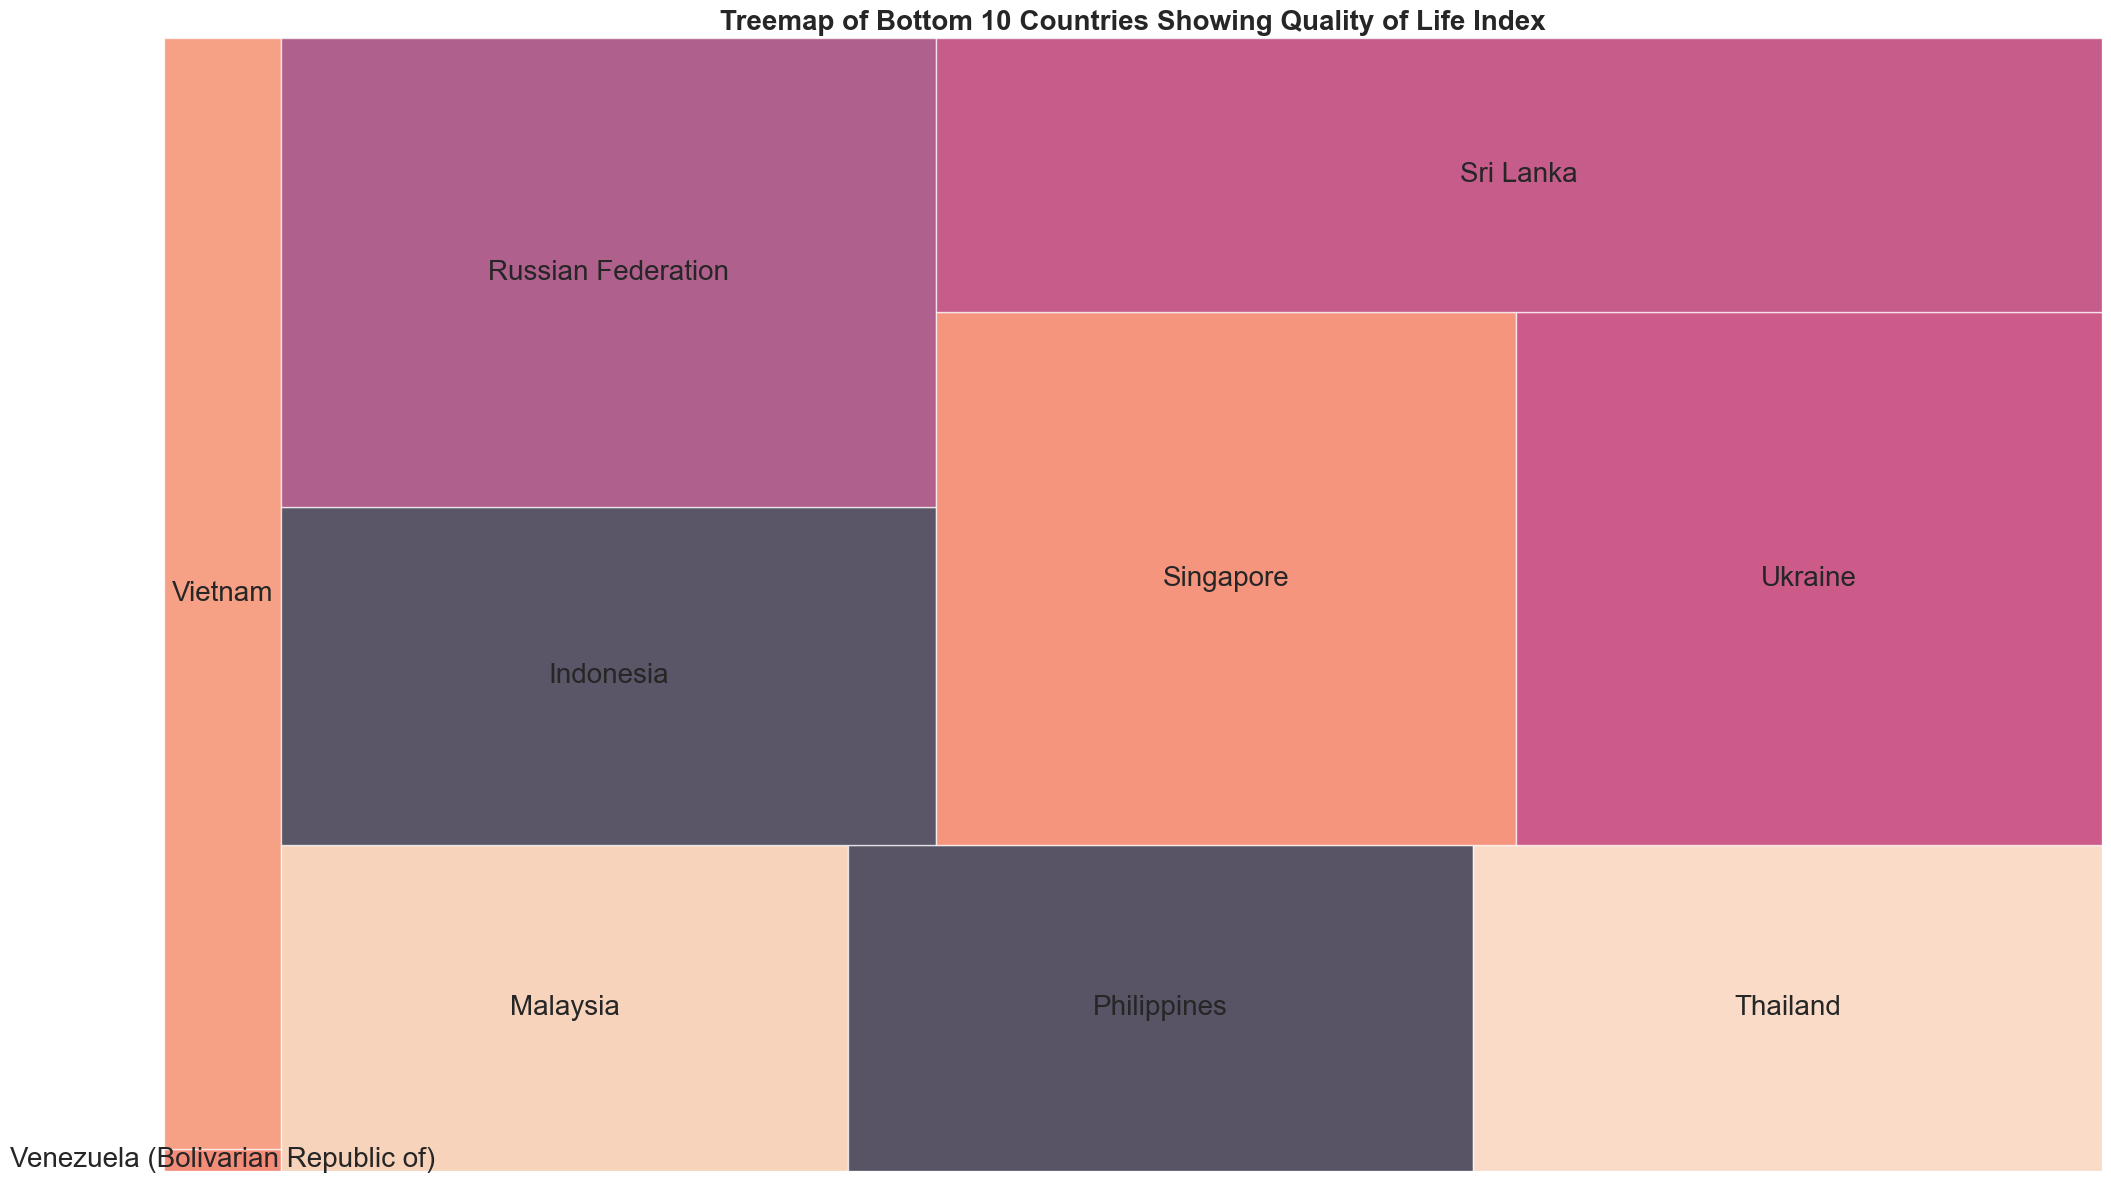

In [28]:
#Tree map of bottom 10 countries based on Quality of Life Index
plt.figure(figsize = (25,15))

squarify.plot(sizes = quality_of_life_index_bottom10, 
              label = country_list_bottom10, 
              pad = False, 
              bar_kwargs={'alpha':.7}, 
              text_kwargs={'fontsize':20})

plt.title('Treemap of Bottom 10 Countries Showing Quality of Life Index', 
          fontweight='bold', 
          fontsize = 20)

plt.axis('off');